In [1]:
import xarray as xr
from src.helper_functions import resample_to_monthly,create_spin
from src.paths import processed_data_path,repo_path

base_path = '/home/jez/'
in_path = f"{processed_data_path}stations_ds.nc"
cfm_data_path = f"{repo_path}CFM_Lancaster/data/cfm_input/"

ds = xr.open_dataset(in_path)

ds = resample_to_monthly(ds)

#NOTE One unfortunate limitation of using datetime64[ns] is that it limits the native representation of dates to those that fall between the years 1678 and 2262.
#NOTE See https://docs.xarray.dev/en/stable/user-guide/time-series.html for how this impacts xarray - essentially if we go back further than 1678 the time coordinate values behave strangely.

start_time,end_time = '1960-01-01', '2016-12-31'
ref_period_start,ref_period_end = '1960-01-01', '1980-01-01'
repeated_spinups = 5# 5 repeated spinups of 20 years would be 100years of spinup 

ds = ds.sel(time=slice(start_time,end_time))

for i in range(repeated_spinups):
    ds_spin = create_spin(ds, ref_period_start,ref_period_end)
    ds = xr.concat([ds_spin,ds],dim='time')
    ds = ds.sortby('time')


huh
huh
huh
huh
huh


In [ ]:
ds.sel(space='IA') or
ds.loc[dict(space='IA')]



In [15]:
ds.loc[dict(time=slice(start_time,end_time))]

<xarray.Dataset>
Dimensions:   (station: 2, time: 684)
Coordinates:
    lon       (station) float64 -36.38 -49.25
    lat       (station) float64 71.8 67.15
    rlon      (station) float64 0.35 -4.55
    rlat      (station) float64 -0.2 -4.4
    height    float64 0.0
  * station   (station) object 'Summit' 'Kan-M'
  * time      (time) datetime64[ns] 1960-01-01 1960-02-01 ... 2016-12-01
    year      (time) float64 1.96e+03 1.96e+03 1.96e+03 ... 2.017e+03 2.017e+03
Data variables:
    snowfall  (time, station) float32 0.4081 0.3238 0.2515 ... 0.2608 0.2222
    precip    (time, station) float32 0.4082 0.3241 0.2515 ... 0.2607 0.2223
    tskin     (time, station) float32 241.2 253.8 237.6 ... 257.1 237.2 252.4
    snowmelt  (time, station) float32 8.255e-05 8.255e-05 ... -4.694e-13
    rainfall  (time, station) float32 2.762e-09 8.596e-09 ... 1.531e-09

In [17]:
ds.snowmelt.loc[dict(time=slice(start_time,end_time))] = ds.snowmelt.sel(time=slice(start_time,end_time))*2

In [ ]:
ds.snowmelt.sel(time=slice(start_time,end_time))

In [10]:
ds.snowmelt.sel(time=slice(start_time,end_time))

<xarray.DataArray 'snowmelt' (time: 684, station: 2)>
array([[ 8.2551844e-05,  8.2551844e-05],
       [-4.1994026e-05, -4.1994026e-05],
       [ 4.0522344e-05,  4.0522344e-05],
       ...,
       [-6.7795634e-05,  1.1174842e-02],
       [-1.2257563e-05, -1.2257563e-05],
       [-4.6941661e-13, -4.6941661e-13]], dtype=float32)
Coordinates:
    lon      (station) float64 -36.38 -49.25
    lat      (station) float64 71.8 67.15
    rlon     (station) float64 0.35 -4.55
    rlat     (station) float64 -0.2 -4.4
    height   float64 0.0
  * station  (station) object 'Summit' 'Kan-M'
  * time     (time) datetime64[ns] 1960-01-01 1960-02-01 ... 2016-12-01
    year     (time) float64 1.96e+03 1.96e+03 1.96e+03 ... 2.017e+03 2.017e+03
Attributes:
    standard_name:  snowmelt
    long_name:      Snow Melt Flux
    units:          m ieq-1 y-1
    grid_mapping:   rotated_pole

In [9]:
ds.snowmelt.sel(time=slice(start_time,end_time)) = ds.snowmelt.sel(time=slice(start_time,end_time))*2

SyntaxError: cannot assign to function call here. Maybe you meant '==' instead of '='? (3055039686.py, line 1)

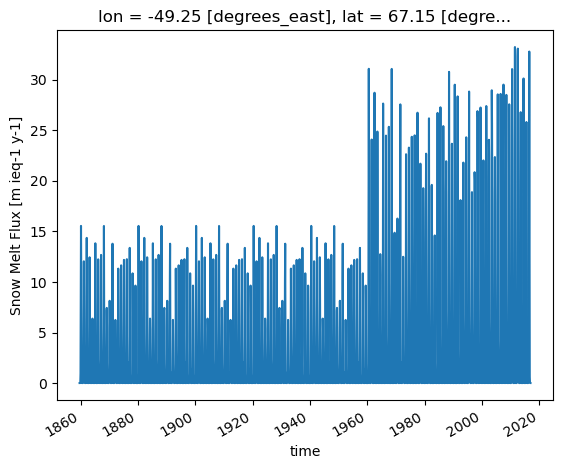

In [19]:
ds.snowmelt.isel(station=1).plot()

In [3]:
ds.snowfall.plot()

TypeError: Plotting requires coordinates to be numeric, boolean, or dates of type numpy.datetime64, datetime.datetime, cftime.datetime or pandas.Interval. Received data of type object instead.

In [7]:
ds['time'][0]

<xarray.DataArray 'time' ()>
array('1960-01-01T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    height   float64 0.0
    time     datetime64[ns] 1960-01-01
    year     float64 1.96e+03

In [23]:
1889/12

157.41666666666666

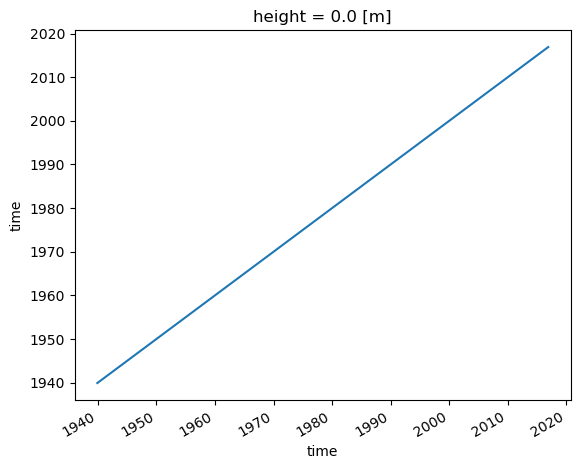

In [28]:
ds.time.plot()

In [8]:
ds = ds.sel(time=slice(start_time,end_time))


KeyError: "cannot represent labeled-based slice indexer for coordinate 'time' with a slice over integer positions; the index is unsorted or non-unique"

In [19]:
ds = ds.sortby('time')

In [20]:
ds.sel(time=slice(ref_period_start,ref_period_end))

<xarray.Dataset>
Dimensions:   (station: 2, time: 241)
Coordinates:
    lon       (station) float64 -36.38 -49.25
    lat       (station) float64 71.8 67.15
    rlon      (station) float64 0.35 -4.55
    rlat      (station) float64 -0.2 -4.4
    height    float64 0.0
  * station   (station) object 'Summit' 'Kan-M'
  * time      (time) datetime64[ns] 1960-01-01 1960-02-01 ... 1980-01-01
    year      (time) float64 1.96e+03 1.96e+03 1.96e+03 ... 1.98e+03 1.98e+03
Data variables:
    snowfall  (time, station) float32 0.4081 0.3238 0.2515 ... 0.1895 0.1788
    precip    (time, station) float32 0.4082 0.3241 0.2515 ... 0.1896 0.1806
    tskin     (time, station) float32 241.2 253.8 237.6 ... 249.9 238.6 256.4
    snowmelt  (time, station) float32 8.255e-05 8.255e-05 ... -4.137e-05
    rainfall  (time, station) float32 2.762e-09 8.596e-09 ... 5.342e-08

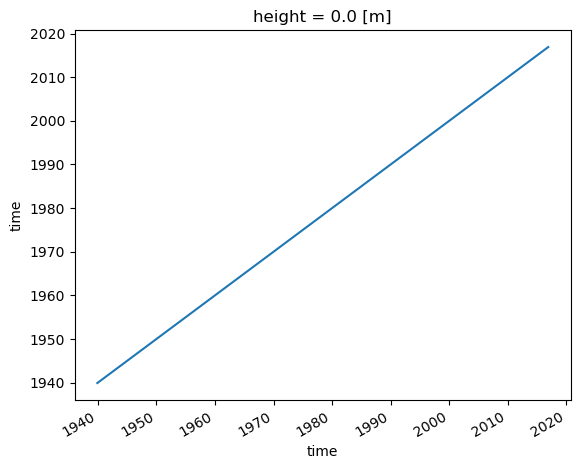

In [16]:
ds.time.plot()

In [9]:
ds

<xarray.Dataset>
Dimensions:   (station: 2, time: 1166)
Coordinates:
    lon       (station) float64 -36.38 -49.25
    lat       (station) float64 71.8 67.15
    rlon      (station) float64 0.35 -4.55
    rlat      (station) float64 -0.2 -4.4
    height    float64 0.0
  * station   (station) object 'Summit' 'Kan-M'
  * time      (time) datetime64[ns] 1939-12-01 1940-01-01 ... 2016-12-01
    year      (time) float64 1.94e+03 1.94e+03 1.94e+03 ... 2.017e+03 2.017e+03
Data variables:
    snowfall  (time, station) float32 0.4081 0.3238 0.2515 ... 0.2608 0.2222
    precip    (time, station) float32 0.4082 0.3241 0.2515 ... 0.2607 0.2223
    tskin     (time, station) float32 241.2 253.8 237.6 ... 257.1 237.2 252.4
    snowmelt  (time, station) float32 8.255e-05 8.255e-05 ... -4.694e-13
    rainfall  (time, station) float32 2.762e-09 8.596e-09 ... 1.531e-09

In [4]:
ds_spin = ds.sel(time=slice('1960-01-01', '1980-01-01'))

KeyError: "cannot represent labeled-based slice indexer for coordinate 'time' with a slice over integer positions; the index is unsorted or non-unique"

In [ ]:
def create_spin(ds, ref_period_start,ref_period_end):
    min_year = ds.year.min()
    ds_spin = ds.sel(time=slice(ref_period_start,ref_period_end))

    time_interval = ds_spin['time'][1]-ds_spin['time'][0]
    time_range = ds_spin['time'][-1]-ds_spin['time'][0]
    ds_spin['time'] = ds_spin['time'] - time_range - time_interval

    year_interval = ds_spin['year'][1]-ds_spin['year'][0]
    year_range = ds_spin['year'][-1]-ds_spin['year'][0]
    ds_spin['year'] = ds_spin['year'] - year_range - year_interval

    return(ds_spin)

In [5]:
ds_spin = ds.sel(time=slice(ref_period_start,ref_period_end))

KeyError: "cannot represent labeled-based slice indexer for coordinate 'time' with a slice over integer positions; the index is unsorted or non-unique"

In [15]:
ds_spin

<xarray.Dataset>
Dimensions:   (time: 241, station: 2)
Coordinates:
    lon       (station) float64 -36.38 -49.25
    lat       (station) float64 71.8 67.15
    rlon      (station) float64 0.35 -4.55
    rlat      (station) float64 -0.2 -4.4
    height    float64 0.0
  * station   (station) object 'Summit' 'Kan-M'
  * time      (time) datetime64[ns] 1960-01-01 1960-02-01 ... 1980-01-01
    year      (time) float64 1.96e+03 1.96e+03 1.96e+03 ... 1.98e+03 1.98e+03
Data variables:
    snowfall  (time, station) float32 0.4081 0.3238 0.2515 ... 0.1895 0.1788
    precip    (time, station) float32 0.4082 0.3241 0.2515 ... 0.1896 0.1806
    tskin     (time, station) float32 241.2 253.8 237.6 ... 249.9 238.6 256.4
    snowmelt  (time, station) float32 8.255e-05 8.255e-05 ... -4.137e-05
    rainfall  (time, station) float32 2.762e-09 8.596e-09 ... 5.342e-08

In [3]:
ds_spin = ds.sel(time=slice('1970-01-01', '2016-12-31'))

In [5]:
ds_spin

<xarray.Dataset>
Dimensions:   (time: 121, station: 2)
Coordinates:
    lon       (station) float64 -36.38 -49.25
    lat       (station) float64 71.8 67.15
    rlon      (station) float64 0.35 -4.55
    rlat      (station) float64 -0.2 -4.4
    height    float64 0.0
  * station   (station) object 'Summit' 'Kan-M'
  * time      (time) datetime64[ns] 1957-01-02 1957-01-30 ... 1967-01-01
    year      (time) float64 1.957e+03 1.957e+03 ... 1.967e+03 1.967e+03
Data variables:
    snowfall  (time, station) float32 0.209 0.2921 0.02774 ... 0.08071 0.4792
    precip    (time, station) float32 0.2091 0.292 0.02774 ... 0.08067 0.5404
    tskin     (time, station) float32 236.6 252.0 224.5 ... 250.4 235.6 257.8
    snowmelt  (time, station) float32 5.314e-05 5.314e-05 ... -1.382e-05 0.06925
    rainfall  (time, station) float32 1.486e-09 -1.744e-09 ... 1.778e-06

In [1]:
import solver

ModuleNotFoundError: No module named 'solver'

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from src.paths import repo_path

results_path = f'{repo_path}/CFM_Lancaster/results/'

ModuleNotFoundError: No module named 'src'

In [3]:
ds = xr.open_dataset(f"{results_path}reformatted_output/Single_Dimension_CFM_Output.nc")

In [4]:
ds

<xarray.Dataset>
Dimensions:             (station: 2, time: 684)
Coordinates:
    year                (time) float32 ...
  * station             (station) object 'Summit' 'Kan-M'
Dimensions without coordinates: time
Data variables:
    delta_ele           (station, time) float32 ...
    cum_ele             (station, time) float32 ...
    tot_compaction      (station, time) float32 ...
    cum_tot_compaction  (station, time) float32 ...

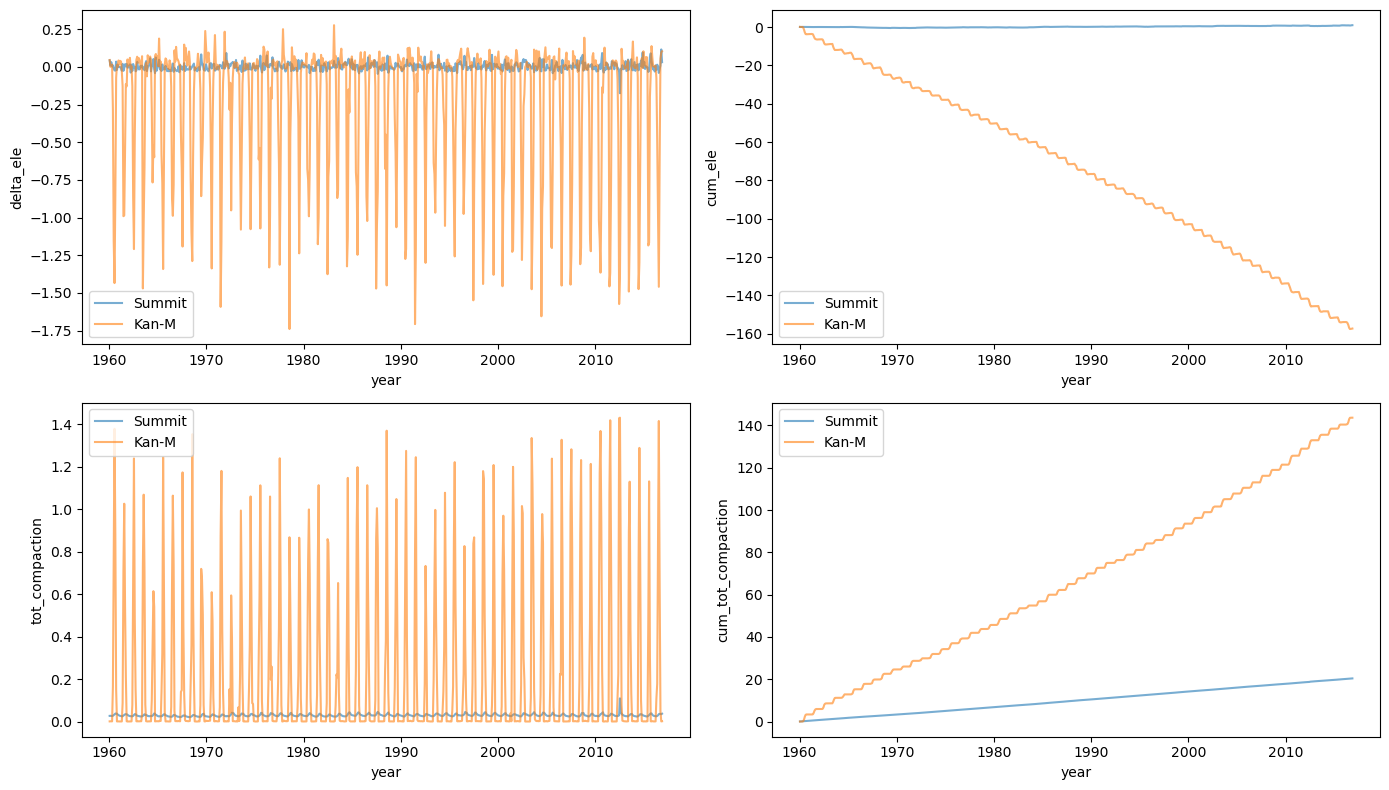

In [11]:
stations = ['Summit','Kan-M']

# outputs = ['delta_ele','cum_ele','tot_compaction','cum_tot_compaction','depth','density']
outputs = ['delta_ele','cum_ele','tot_compaction','cum_tot_compaction','depth','density']
outputs_fullnames = ['Elevation Change / m','Cumulative Elevation Change / m','Total Compaction / m','Cumulative Total Compaction / m']

fig, subplots = plt.subplots(2, 2,figsize=(14,8))
for station in stations:
    for ax,output in zip(subplots.flat,outputs):
        ds[output].isel(time=slice(1,None)).sel(station=station).plot.line(x='year',alpha=0.6,ax=ax,label=station)
        ax.set_title('')
        ax.legend()
fig.tight_layout()


In [5]:
ds.cum_ele.plot()

TypeError: Plotting requires coordinates to be numeric, boolean, or dates of type numpy.datetime64, datetime.datetime, cftime.datetime or pandas.Interval. Received data of type object instead.

In [ ]:
/home/jez/Community_Firn_Model_Forked/CommunityFirnModel/CFM_Lancaster/results/reformatted_output/Single_Dimension_CFM_Output.nc

In [ ]:
stations = ['Summit','Kan-M']
ds_list = []
for station in stations:
    results_folder = f"{results_path}{station}/"
    results_filename = f"{results_folder}Results_{station}.hdf5"
    ds = xr.open_dataset(results_filename)

In [3]:
from src.paths import processed_data_path